In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import kagglehub
crawford_emnist_path = kagglehub.dataset_download('crawford/emnist')

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,ZeroPadding2D,Dropout
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.18.0


In [ ]:
img_width=28
img_height=28

In [ ]:
datagen=ImageDataGenerator(1/255.0,validation_split=0.2)

In [ ]:
# data = pd.read_csv("/kaggle/input/emnist/emnist-digits-train.csv") # Original code
data = pd.read_csv(crawford_emnist_path + "/emnist-digits-train.csv") # Corrected path

In [ ]:
data.head()

,8,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(239999, 785)

In [ ]:
data.info

<bound method DataFrame.info of         8  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.511  0.512  \
0       9  0    0    0    0    0    0    0    0    0  ...      0      0   
1       6  0    0    0    0    0    0    0    0    0  ...      0      0   
2       3  0    0    0    0    0    0    0    0    0  ...      0      0   
3       6  0    0    0    0    0    0    0    0    0  ...      0      0   
4       6  0    0    0    0    0    0    0    0    0  ...      0      0   
...    .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
239994  4  0    0    0    0    0    0    0    0    0  ...      0      0   
239995  2  0    0    0    0    0    0    0    0    0  ...      0      0   
239996  1  0    0    0    0    0    0    0    0    0  ...      0      0   
239997  1  0    0    0    0    0    0    0    0    0  ...      0      0   
239998  0  0    0    0    0    0    0    0    0    0  ...      0      0   

        0.513  0.514  0.515  0.516  0.517  0.518  0.519  0.520  
0           0      0      0      0      0      0      0      0  
1           0      0      0      0      0      0      0      0  
2           0      0      0      0      0      0      0      0  
3           0      0      0      0      0      0      0      0  
4           0      0      0      0      0      0      0      0  
...       ...    ...    ...    ...    ...    ...    ...    ...  
239994      0      0      0      0      0      0      0      0  
239995      0      0      0      0      0      0      0      0  
239996      0      0      0      0      0      0      0      0  
239997      0      0      0      0      0      0      0      0  
239998      0      0      0      0      0      0      0      0  

[239999 rows x 785 columns]>

In [ ]:
data.columns

Index(['8', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.511', '0.512', '0.513', '0.514', '0.515', '0.516', '0.517', '0.518',
       '0.519', '0.520'],
      dtype='object', length=785)

In [ ]:
x_train = data.drop(columns="8")
y_train = data["8"]

In [ ]:
x_train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.head()

,8
0,9
1,6
2,3
3,6
4,6


In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")

x_train shape: (239999, 784)
y_train shape: (239999,)
239999 train samples


In [ ]:
x_train = np.array(x_train)
x_train = x_train.reshape(-1, 28, 28,1)  # Grayscale → 1 channel
# Scale images to the [0, 1] range
x_train = x_train / 255.0
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")

x_train shape: (239999, 28, 28, 1)
239999 train samples


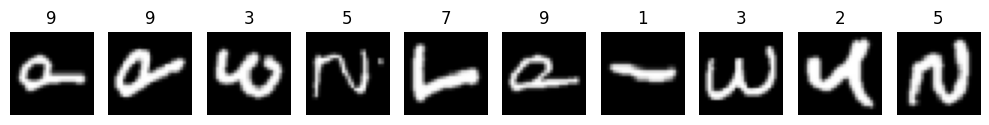

In [ ]:
# Plot 10 random images from the training set
plt.figure(figsize=(10, 2))
for i in range(10):
    idx = np.random.randint(0, x_train.shape[0])
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(str(y_train[idx]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)

In [ ]:
print("y_train shape:", y_train.shape)  # should be (60000,)
print("y_train example:", y_train[0])

y_train shape: (239999, 10)
y_train example: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

model = keras.Sequential()
model.add(Conv2D(30, (3, 3),input_shape=(img_width,img_height,1),activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(30, (3, 3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Dropout(0.2))

model.add(Dense(10,activation="softmax"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 30)     │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 30)     │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 750)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        48,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,144 (223.22 KB)

 Trainable params: 57,144 (223.22 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("y_train shape:", y_train.shape)  # should be (60000,)
print("y_train example:", y_train[0])

y_train shape: (239999, 10)
y_train example: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss="categorical_crossentropy",optimizer="Adam", metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,epochs=10)

Epoch 1/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 181s 24ms/step - accuracy: 0.9526 - loss: 0.1568
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 199s 23ms/step - accuracy: 0.9899 - loss: 0.0348
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 201s 23ms/step - accuracy: 0.9922 - loss: 0.0270
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 204s 24ms/step - accuracy: 0.9933 - loss: 0.0240
Epoch 5/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 171s 23ms/step - accuracy: 0.9938 - loss: 0.0214
Epoch 6/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 204s 23ms/step - accuracy: 0.9944 - loss: 0.0194
Epoch 7/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 201s 23ms/step - accuracy: 0.9945 - loss: 0.0191
Epoch 8/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 202s 23ms/step - accuracy: 0.9950 - loss: 0.0170
Epoch 9/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 199s 23ms/step - accuracy: 0.9956 - loss: 0.0148
Epoch 10/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 170s 23ms/step - accuracy: 0.9953 - loss: 0.0155


In [ ]:
data_test = pd.read_csv(crawford_emnist_path + "/emnist-digits-test.csv")

In [ ]:
x_test = data_test.drop(columns="0")
y_test = data_test["0"]

In [ ]:
data_test.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.472,0.473,0.474,0.475,0.476,0.477,0.478,0.479,0.480,0.481
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_test.shape

(39999, 785)

In [ ]:
x_test.shape

(39999, 784)

In [ ]:
y_test.shape

(39999,)

In [ ]:
x_test = np.array(x_test)
x_test = x_test.reshape(-1, 28, 28,1)  # Grayscale → 1 channel
# Scale images to the [0, 1] range
x_test = x_test / 255.0

In [ ]:
y_test = to_categorical(y_test, 10)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9935 - loss: 0.0256
Test Accuracy: 0.9938998222351074


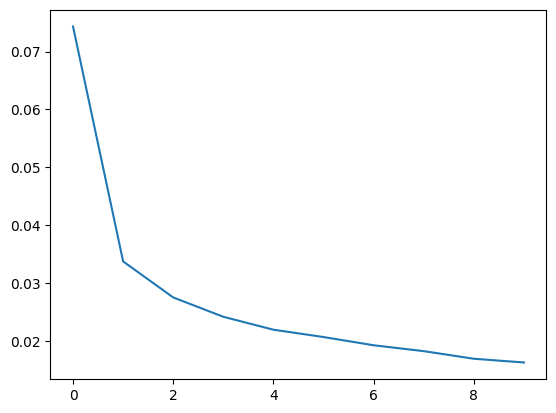

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), [np.argmax(y) for y in model.predict(x_test)]))

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3999
           1       1.00      1.00      1.00      4000
           2       0.99      0.99      0.99      4000
           3       0.99      0.99      0.99      4000
           4       1.00      0.99      0.99      4000
           5       0.99      0.99      0.99      4000
           6       0.99      1.00      1.00      4000
           7       0.99      1.00      0.99      4000
           8       0.99      0.99      0.99      4000
           9       0.99      0.99      0.99      4000

    accuracy                           0.99     39999
   macro avg       0.99      0.99      0.99     39999
weighted avg       0.99      0.99      0.99     39999



In [ ]:
import gradio as gr
from PIL import Image,ImageOps
def predict_digit(data):
    try:
      # Convert NumPy array from Sketchpad to grayscale PIL image
        image = data["composite"]  # Not 'image'!

        # Convert to grayscale
        image = Image.fromarray(image).convert("L")
        image = ImageOps.mirror(image)
        image = image.rotate(90)
        image = np.invert(image)
        img = np.array(image)

        # Find bounding box of non-zero pixels (i.e., where user drew something)
        coords = np.argwhere(img > 20)  # You can tweak this threshold if needed
        if coords.size == 0:
            return "No digit detected."
        y0, x0 = coords.min(axis=0)
        y1, x1 = coords.max(axis=0) + 1  # +1 to include the last pixel

        # Crop the image to content
        cropped = img[y0:y1, x0:x1]

        # Resize to 20x20
        resized = Image.fromarray(cropped).resize((20, 20), Image.LANCZOS)
        new_img = Image.new("L", (28, 28))
        new_img.paste(resized, ((28 - 20) // 2, (28 - 20) // 2))
        image = np.array(new_img) / 255.0
        image = image.reshape(1, 28, 28, 1)

        prediction = model.predict(image)

        return f"Predicted Digit: {np.argmax(prediction)}\nConfidence: {np.max(prediction)*100:0.1f}"
    except Exception as e:
      return f"Error: {e}"
demo = gr.Interface(
    fn=predict_digit,
    inputs=gr.Sketchpad(image_mode="L",height=280,width=280),
    outputs="text",
    title="Digit Classifier",
    description="Draw a digit (0–9) and let the model predict it!"
)
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://21d67ecdcaeab737af.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
